# AWS Lambda

## Serverless Computing

- Build and deploy, Monitor and maintain

- No infrastructure managed

- PaaS 

## AWS Lambda

- Fully managed

- Event-driven invocation
- Offers subsecond metering
- Limits function runtime to a maximum of **15** minutes
- Multiple programming languages

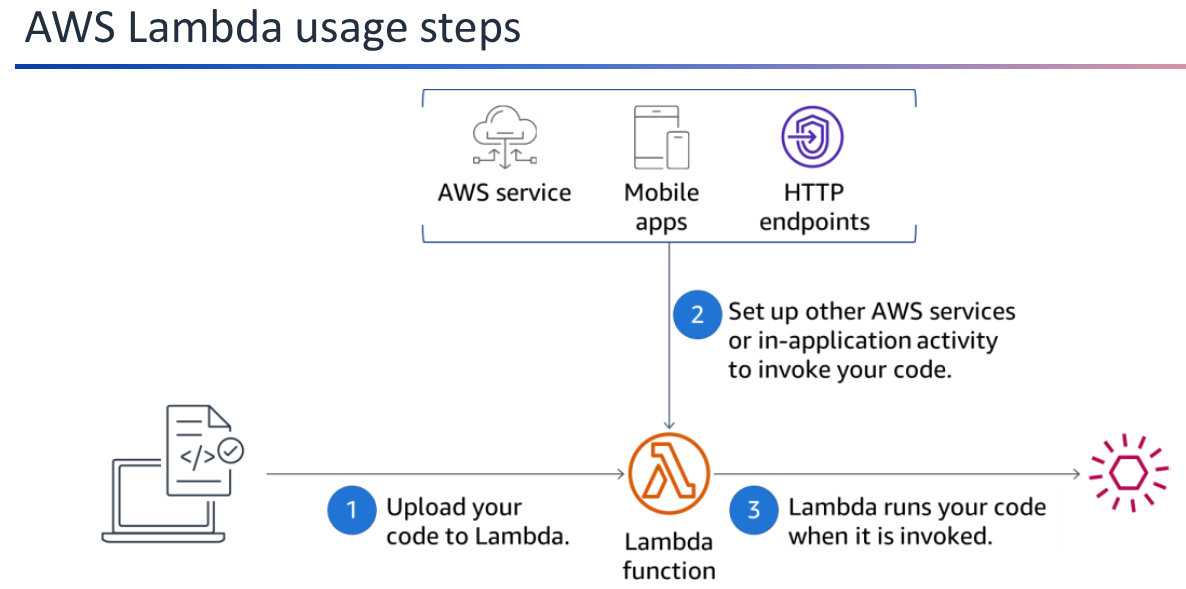

## Develop and Deploy a Lambda function

1. define a **handler** class, which can specify where Lambda can begin running your code. For example, [Lambda Function Handlet in Python](https://docs.aws.amazon.com/lambda/latest/dg/python-handler.html)

2. Create Lambda function

3. Configure access to resources by using AWS Identity and Access Management (IAM) roles and permissions. 

4. Upload, test, verify your code, and review your logs.

6. Monitor using Amazon CloudWatch. Examples might include number of requests, latency, and number of requests with the given error.

Below is a sample Lambda code

In [ ]:
import json
import os
import logging
import boto3

# Initialize the S3 client outside of the handler
s3_client = boto3.client('s3')

# Initialize the logger
logger = logging.getLogger()
logger.setLevel("INFO")

#* Helper function to upload receipt to S3
def upload_receipt_to_s3(bucket_name, key, receipt_content):
    """Helper function to upload receipt to S3"""
    
    try:
        s3_client.put_object(
            Bucket=bucket_name,
            Key=key,
            Body=receipt_content
        )
    except Exception as e:
        logger.error(f"Failed to upload receipt to S3: {str(e)}")
        raise

#*  Lambda handler
def lambda_handler(event, context):
    """
    Main Lambda handler function
    Parameters:
        event: Dict containing the Lambda function event data
        context: Lambda runtime context
    Returns:
        Dict containing status message
    """
    try:
        # Parse the input event
        order_id = event['Order_id']
        amount = event['Amount']
        item = event['Item']
        
        # Access environment variables
        bucket_name = os.environ.get('RECEIPT_BUCKET')
        if not bucket_name:
            raise ValueError("Missing required environment variable RECEIPT_BUCKET")

        # Create the receipt content and key destination
        receipt_content = (
            f"OrderID: {order_id}\n"
            f"Amount: ${amount}\n"
            f"Item: {item}"
        )
        key = f"receipts/{order_id}.txt"

        # Upload the receipt to S3
        upload_receipt_to_s3(bucket_name, key, receipt_content)

        logger.info(f"Successfully processed order {order_id} and stored receipt in S3 bucket {bucket_name}")
        
        return {
            "statusCode": 200,
            "message": "Receipt processed successfully"
        }

    except Exception as e:
        logger.error(f"Error processing order: {str(e)}")
        raise

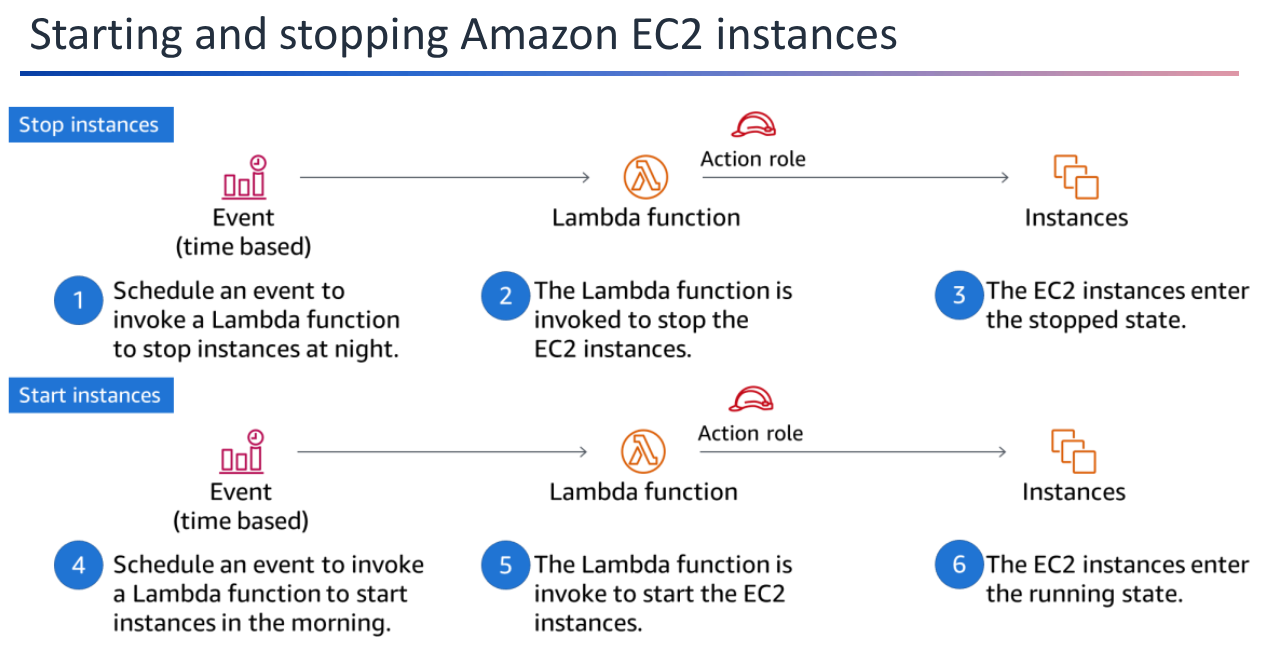

Automate this process with **Amazon EventBridge**. See [Stopping and Starting EC2 instances with Lambda and EventBridge](https://aws.amazon.com/premiumsupport/knowledge-center/start-stop-lambda-eventbridge/).

## [AWS Lambda layers](https://docs.aws.amazon.com/lambda/latest/dg/configuration-layers.html)

- Configure Lambda to use libraries not included in the deployment package

- Keep small deployment package
- Avoid errors in code for package dependencies
- Share libraries with other developers

## AWS Lambda Quotas

Quotas include the following:
- Compute and storage resources
- Function configuration, deployment, and execution
- Lambda API requests

A function that exceeds any of the limits will fail with an exceeded limits exception.

-  Lambda also sets quotas on concurrency and package size (250 MB as of this writing). 
    - If you are troubleshooting a Lambda deployment, keep these in mind.
- As of this writing, the maximum memory allocation for a single Lambda function is 10 GB

# Lab 178 - Working with AWS Lambda

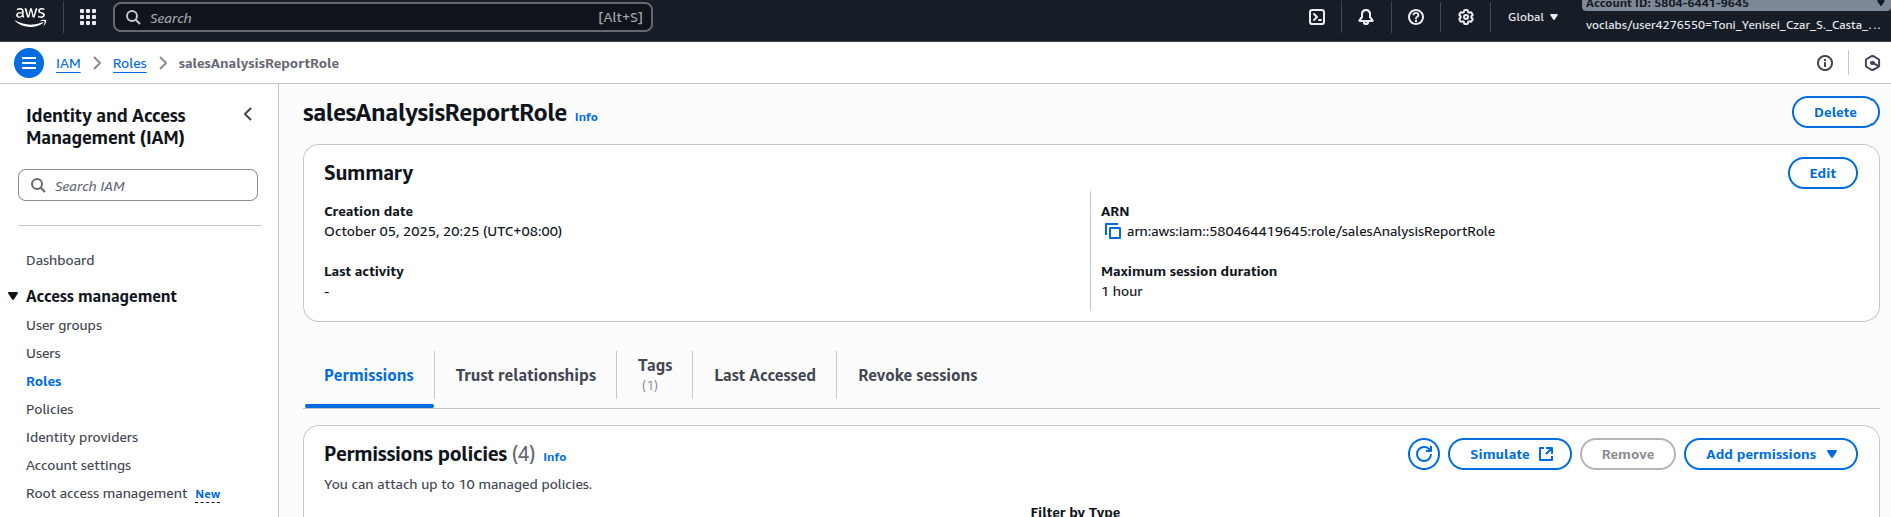

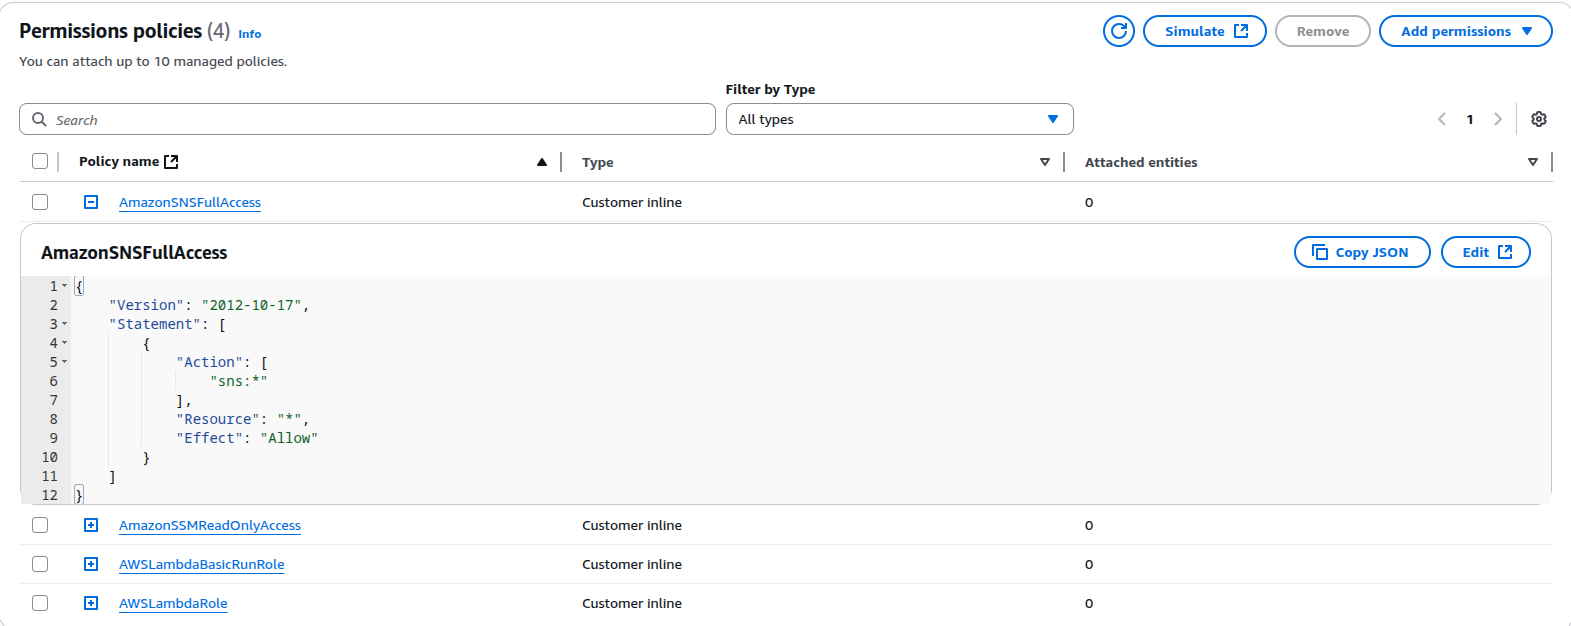

## Create a Lambda Layer

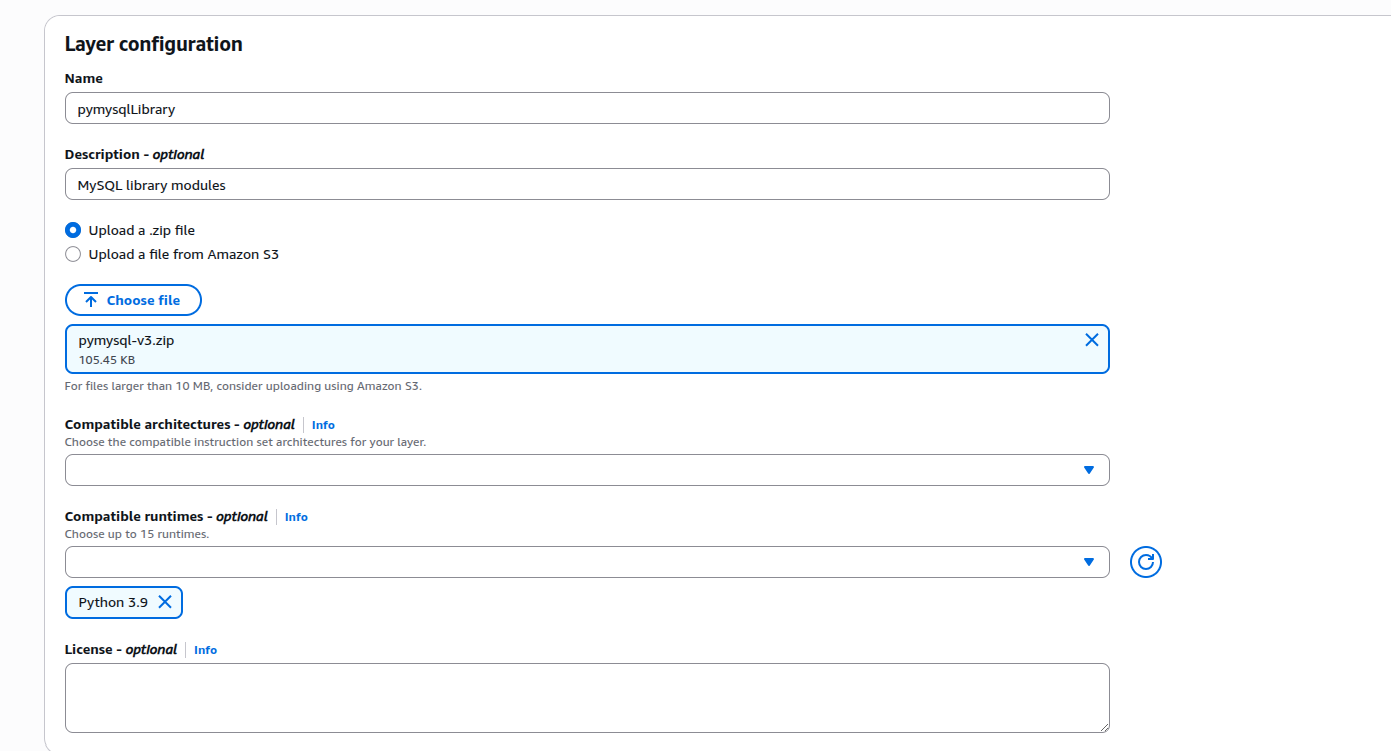

## Creating a Data Extracting Lambda Function

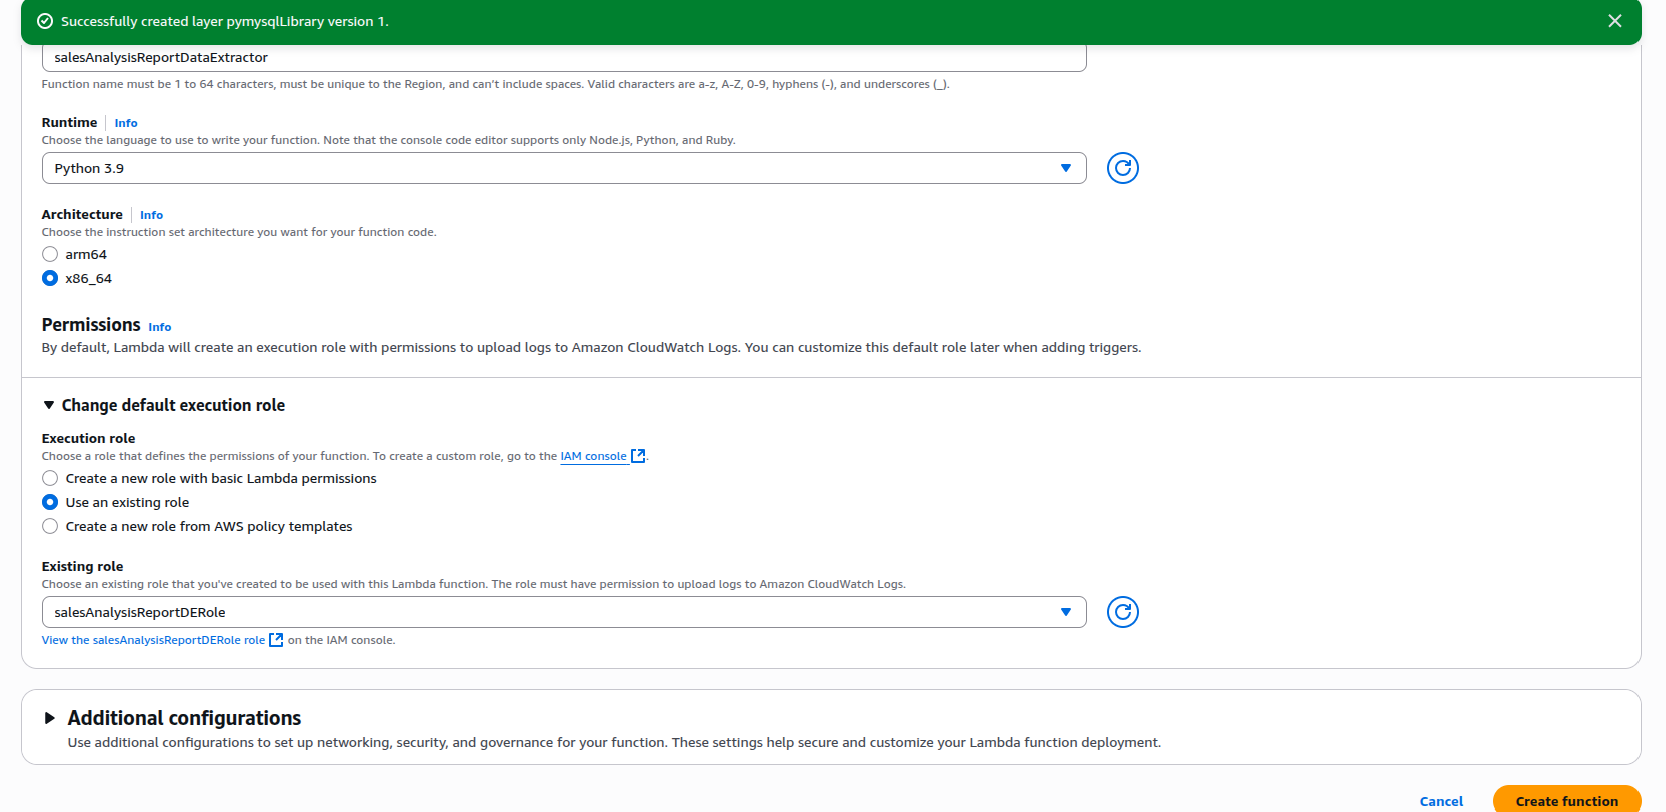

### Add Lambda Layer to Function

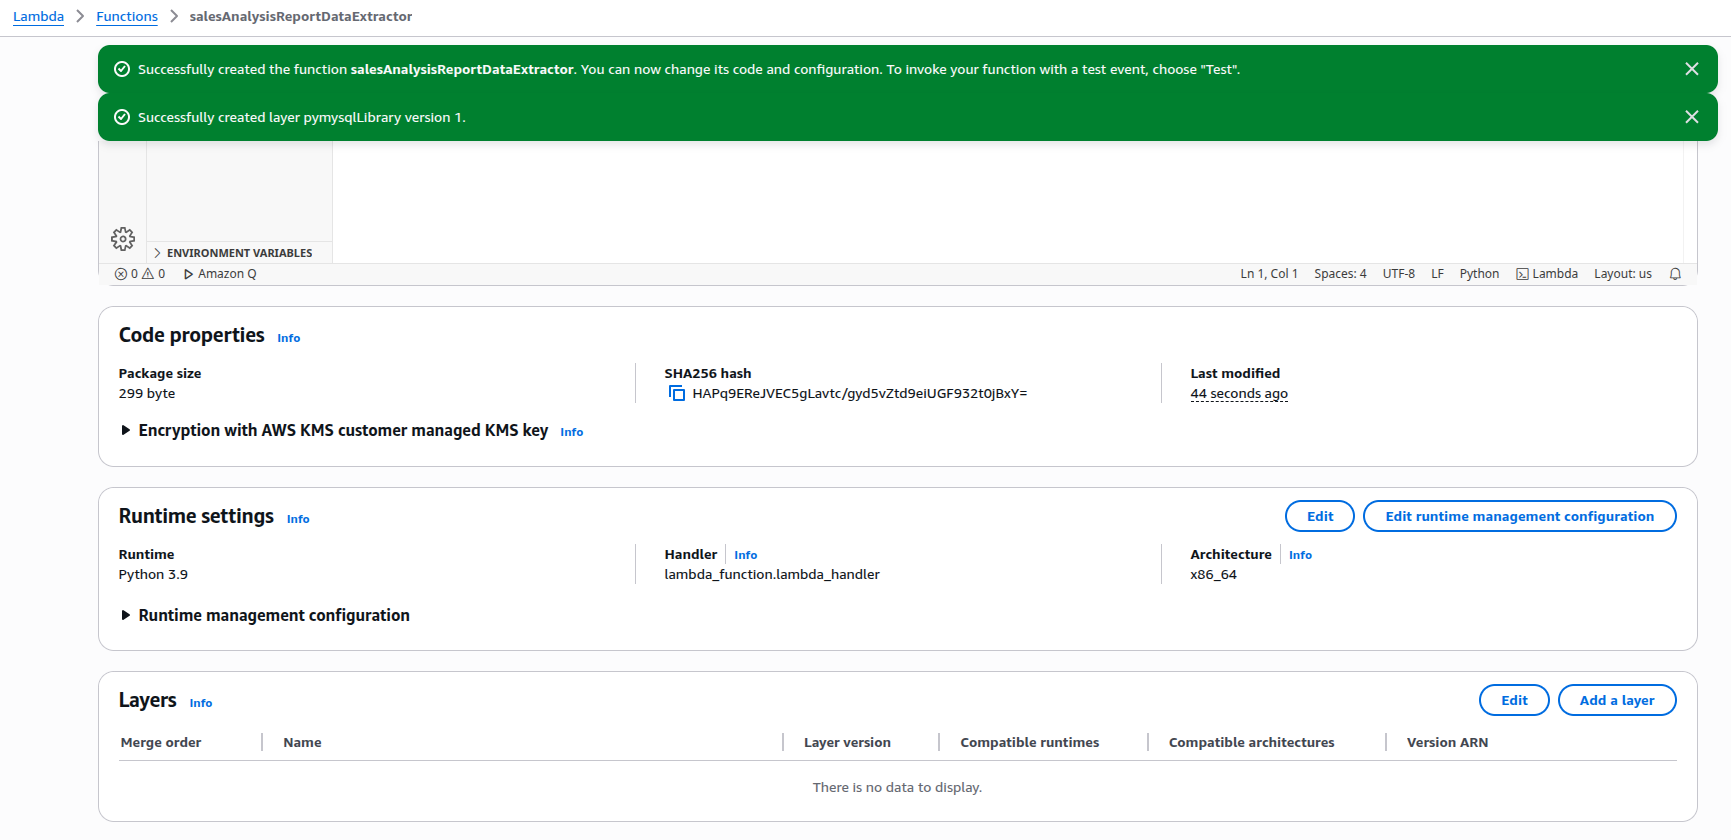

### Importing the code for the data extractor Lambda function

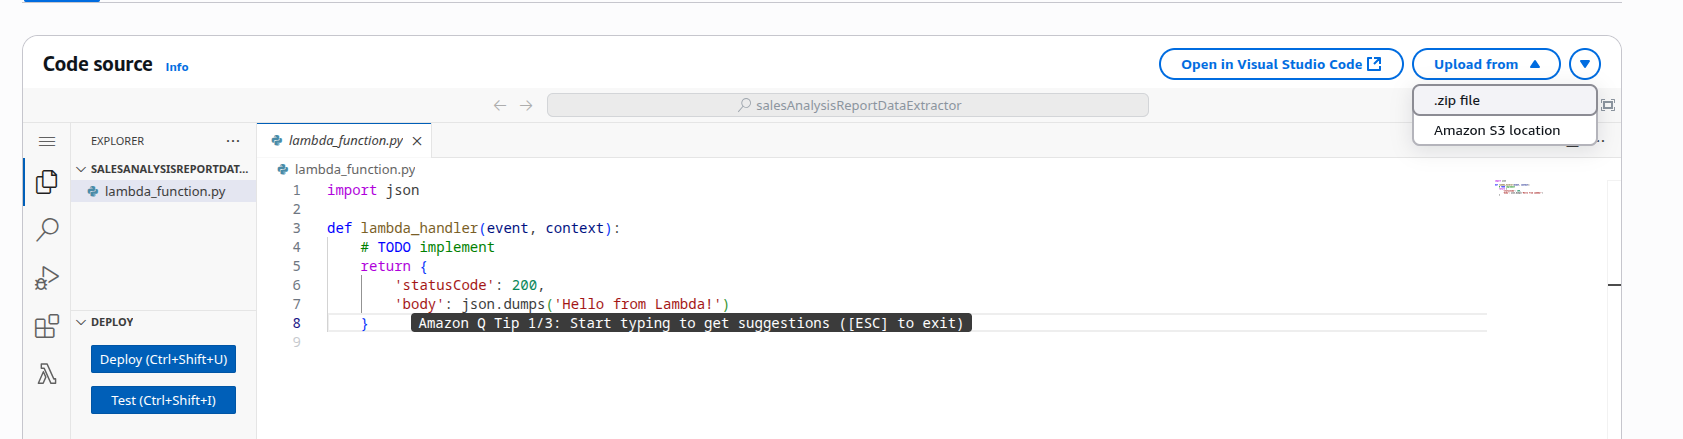

### Configuring Network Settings

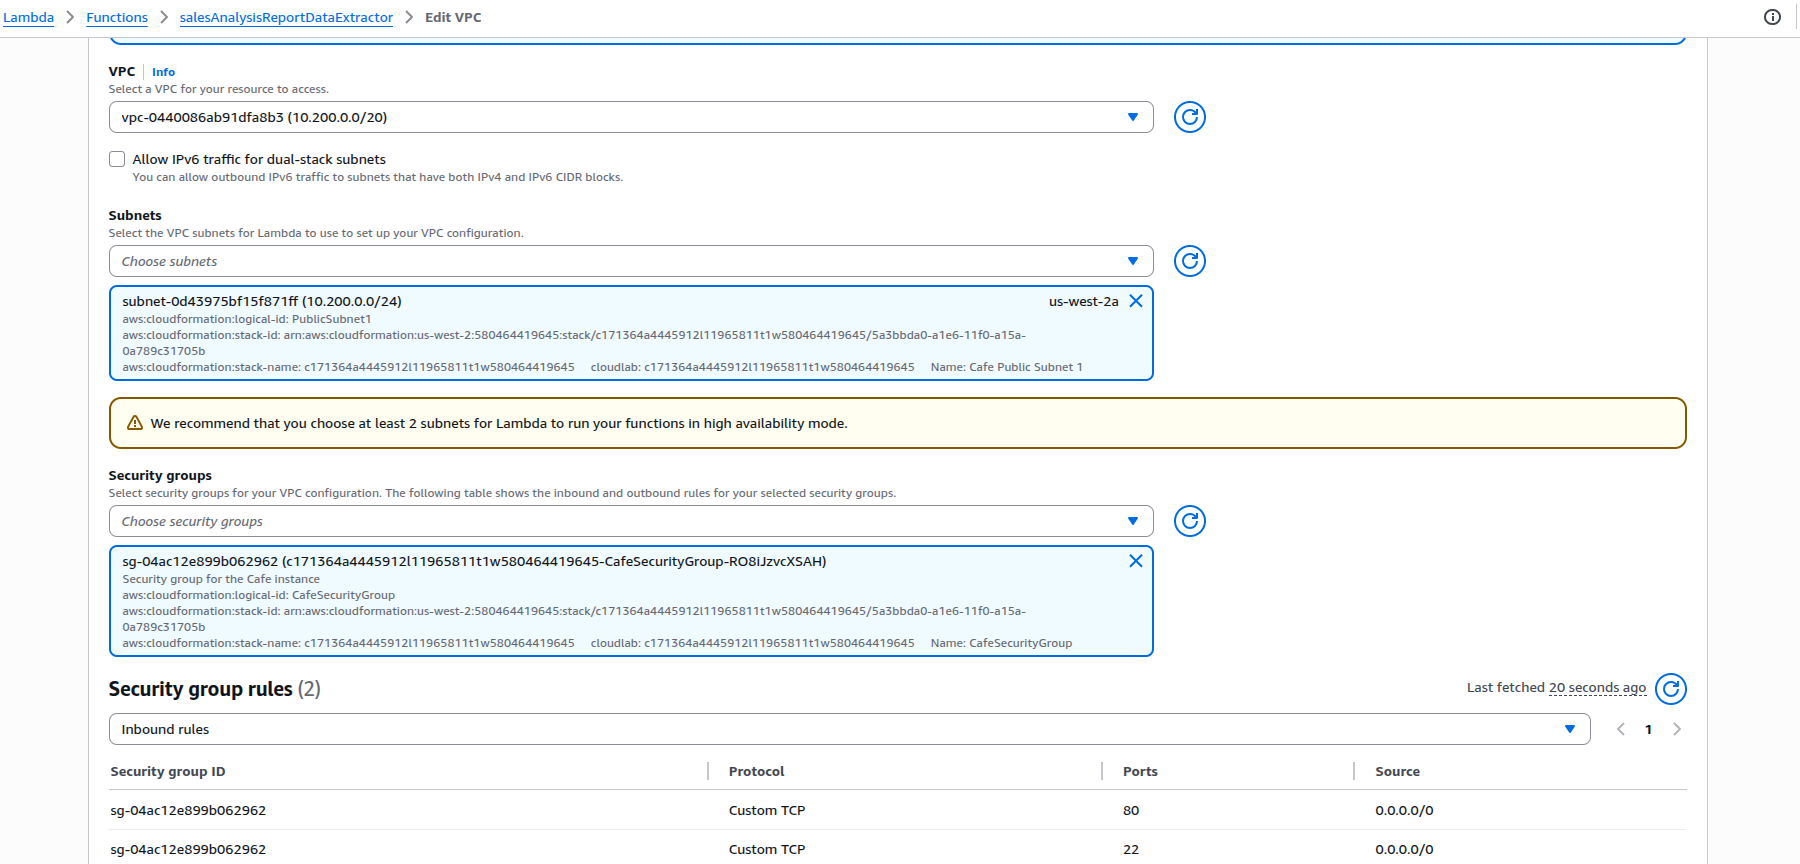

## Testing the data extractor Lambda function

### Launching a test of the Lambda function

- Go to Systems Manager > Parameter Store and copy some values needed for testing
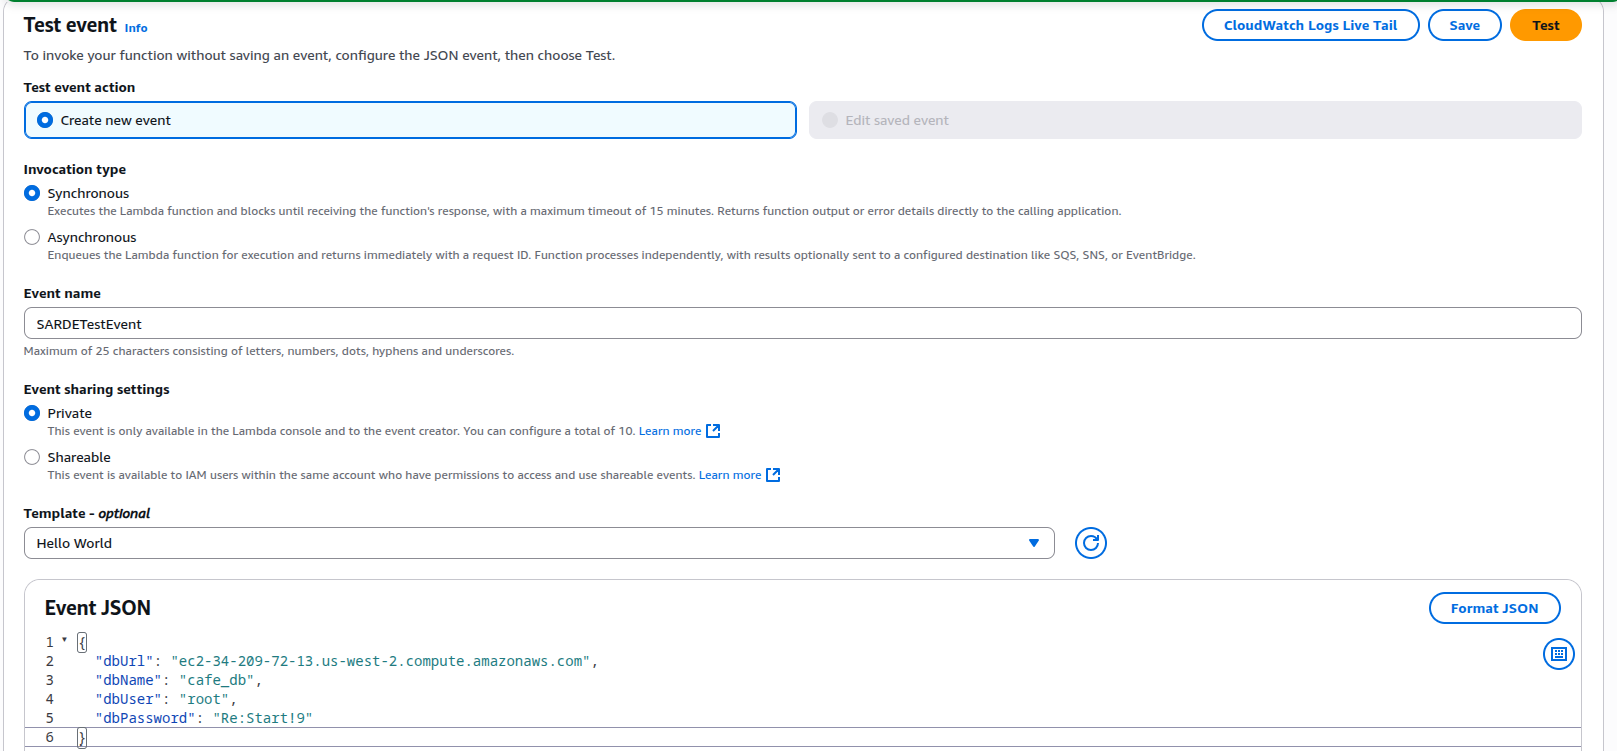

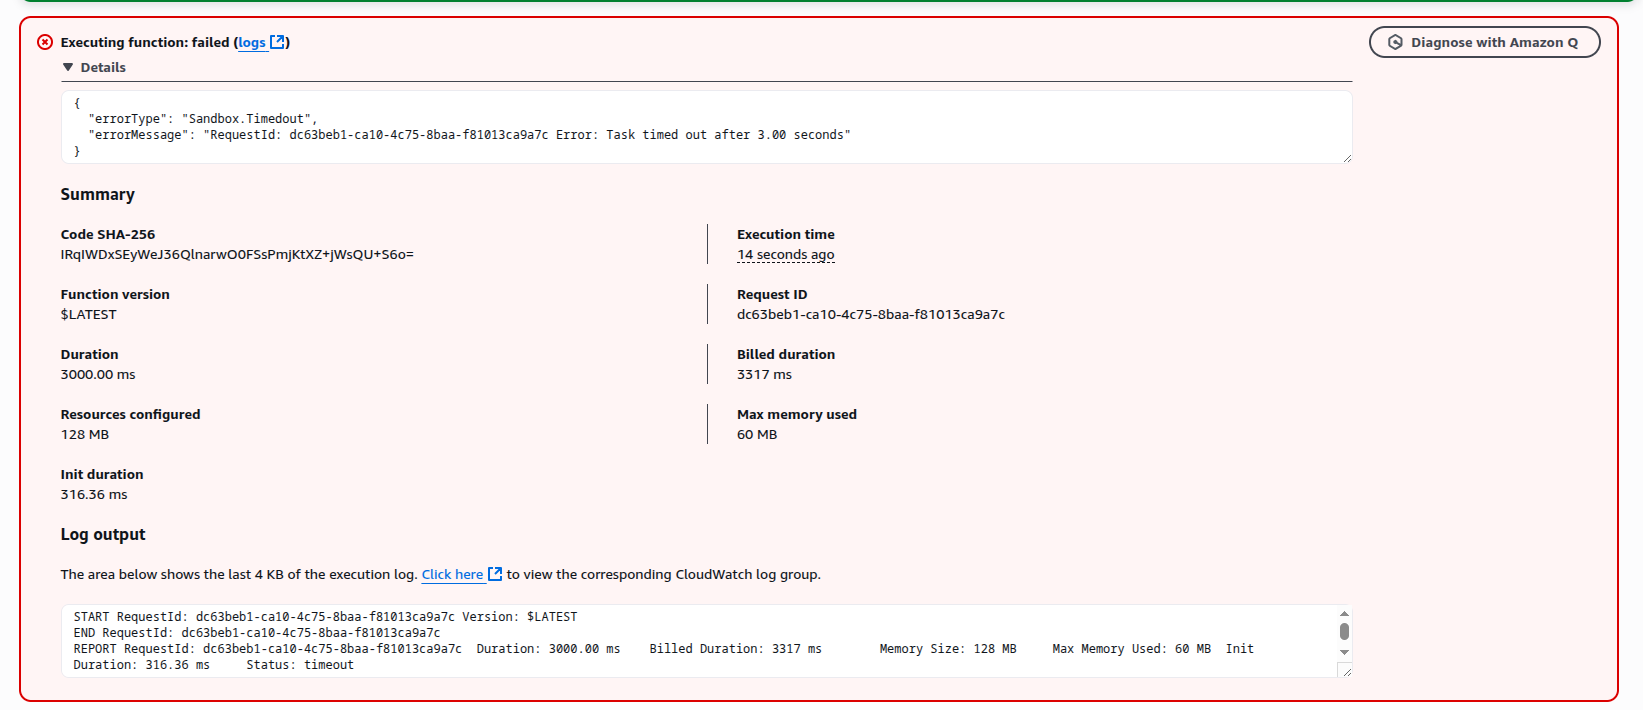

### Troubleshooting the Error
- The code connect to a MySQL server, which is port **3306**. Checking the VPC, we see that there are no Inbound Rules for that port number

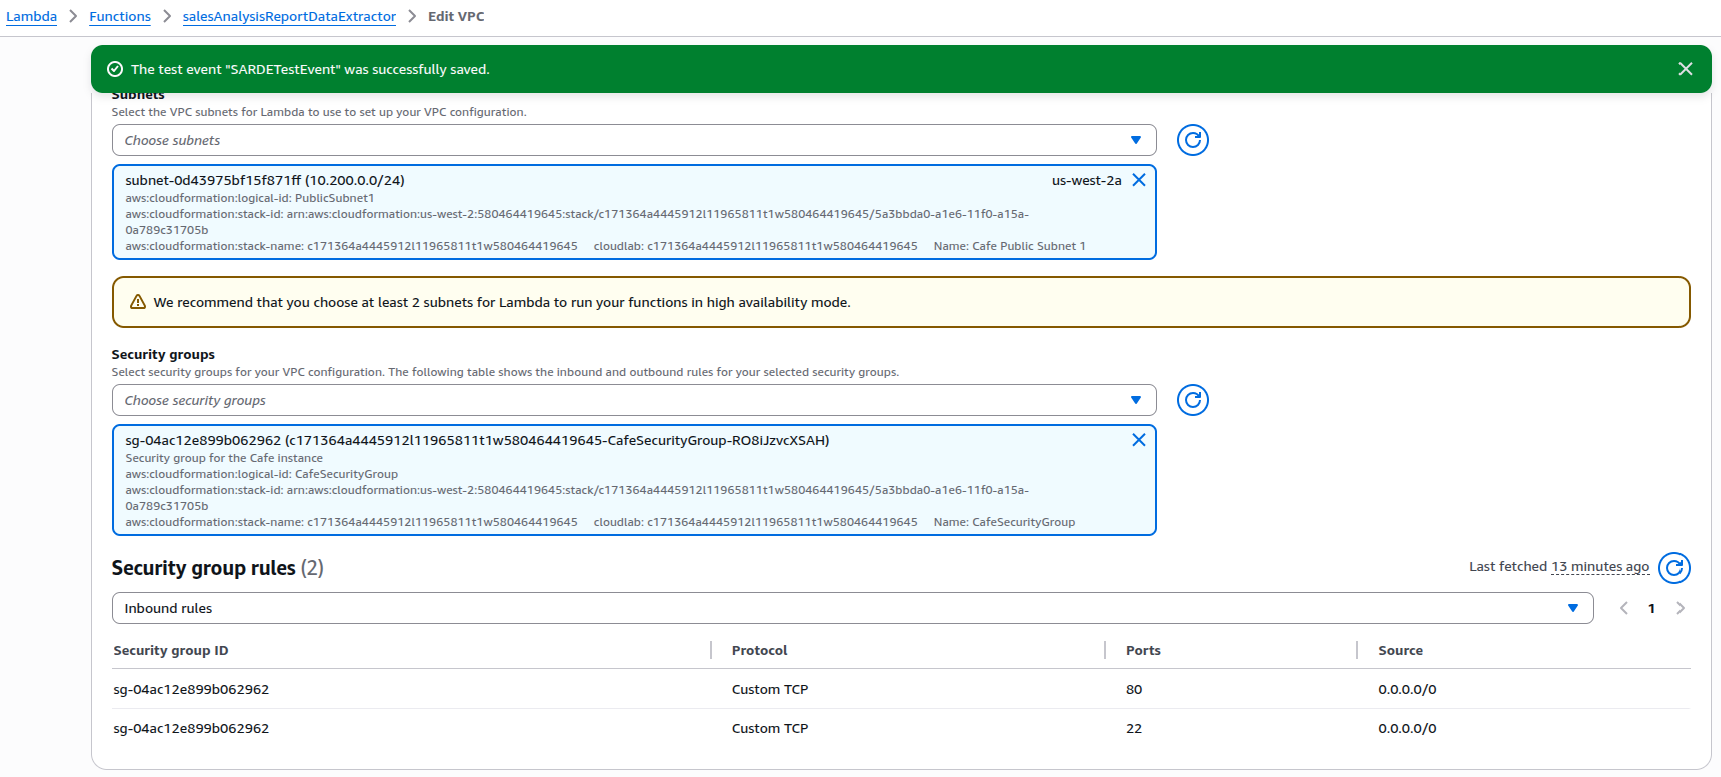

- **Solution**: Add to the VPC an inbound rule for MySQL.

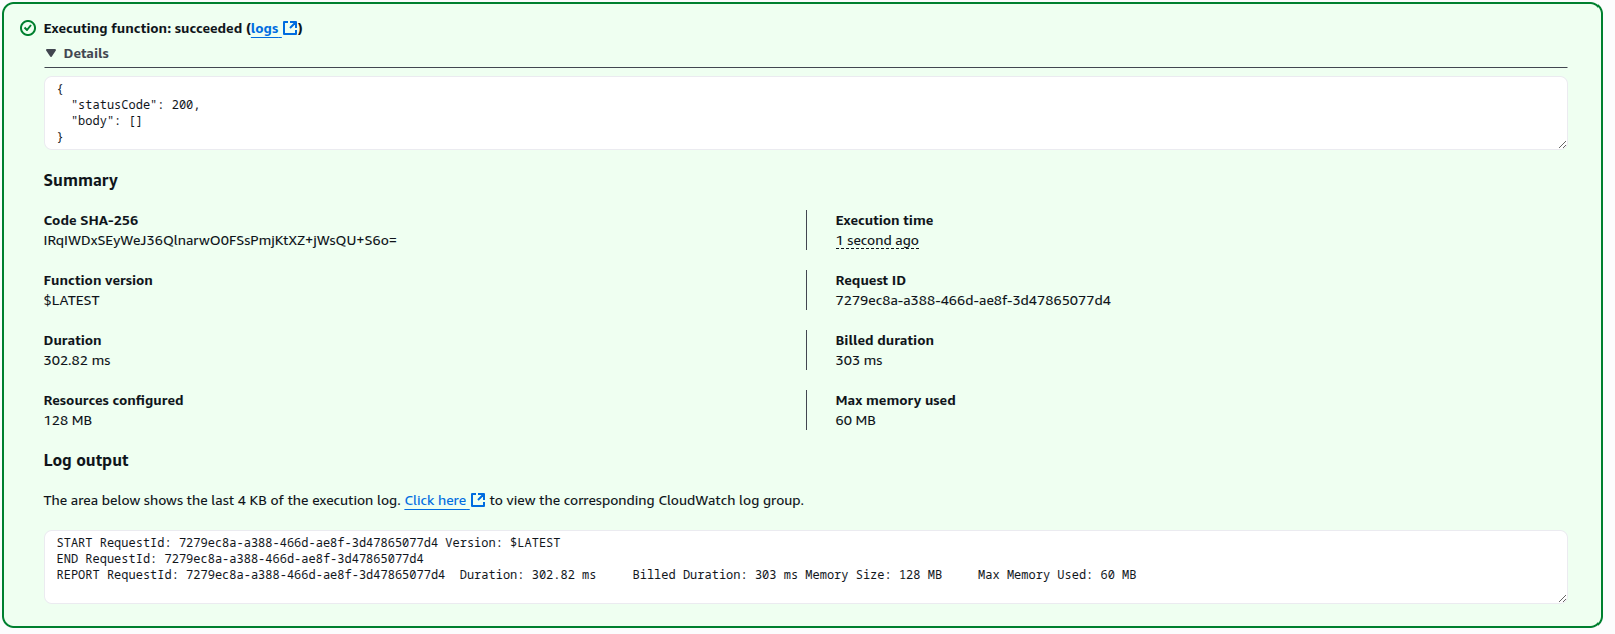



## Testing the Function with Populated Database

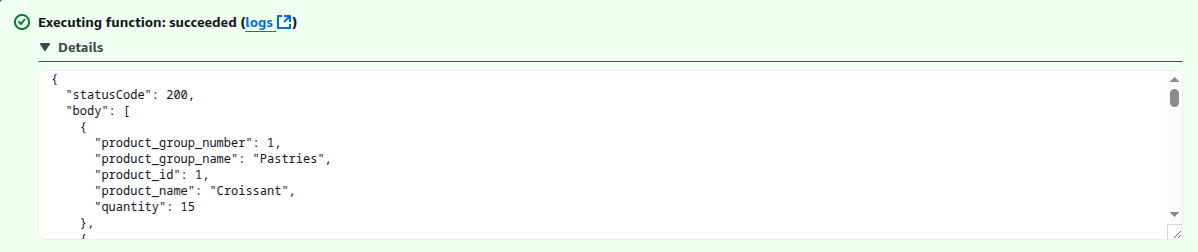

## Configuring notifications

### Creating an SNS Topic

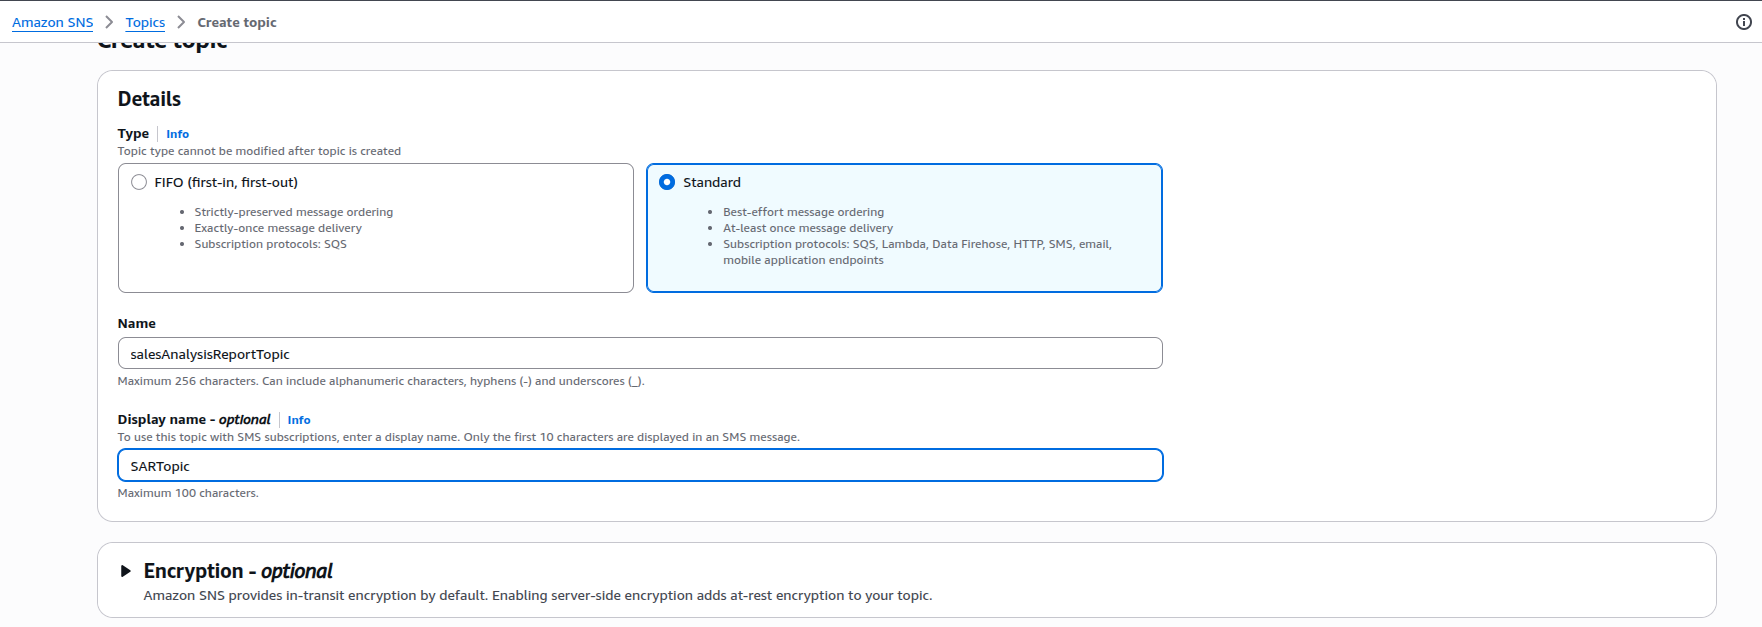

- When created, copy and paste the ARN value into a text document.

### Subscribing to the SNS Topic

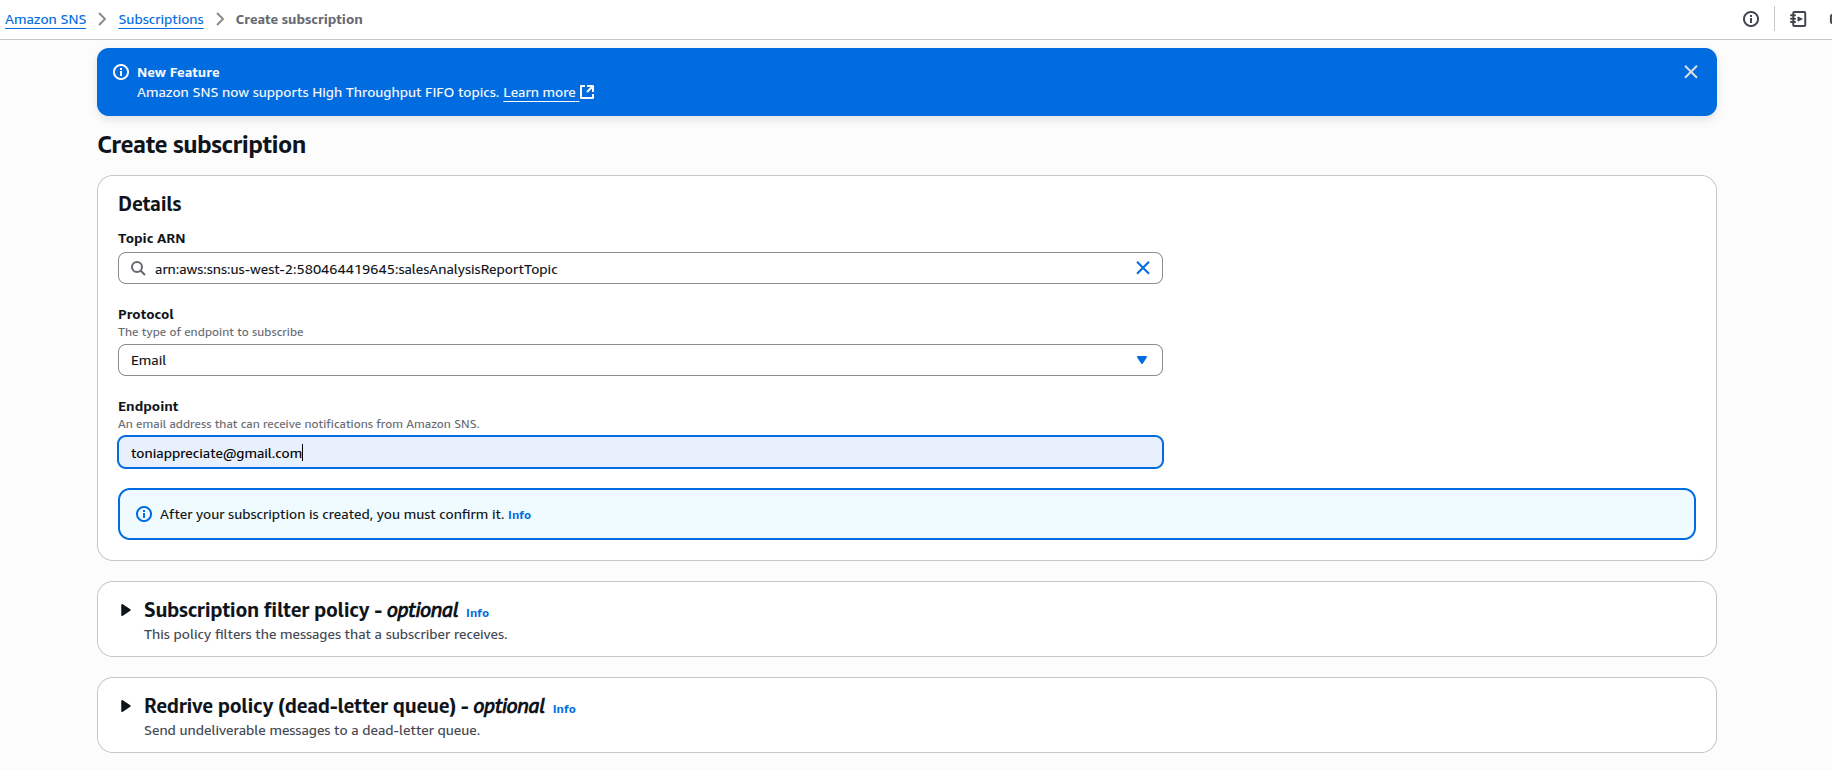

## Creating the `salesAnalysisReport` Lambda function

### Create

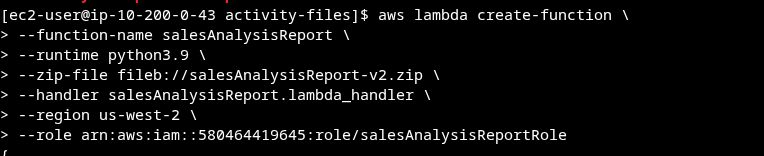

### Returned

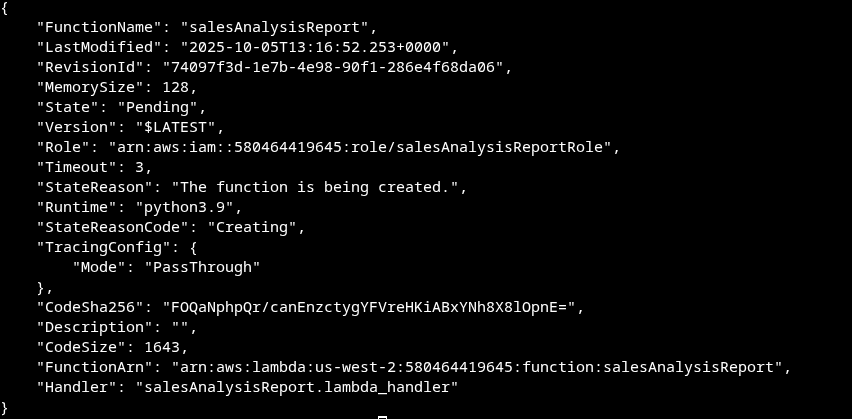

### Configuring the Function

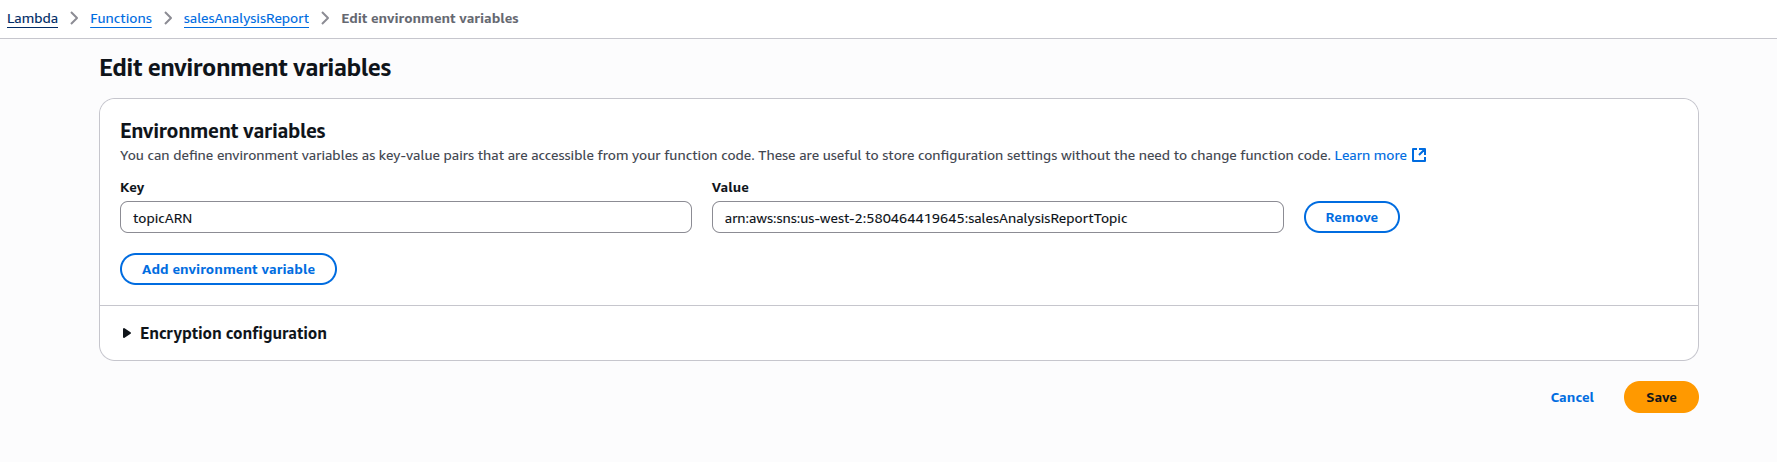

### Testing

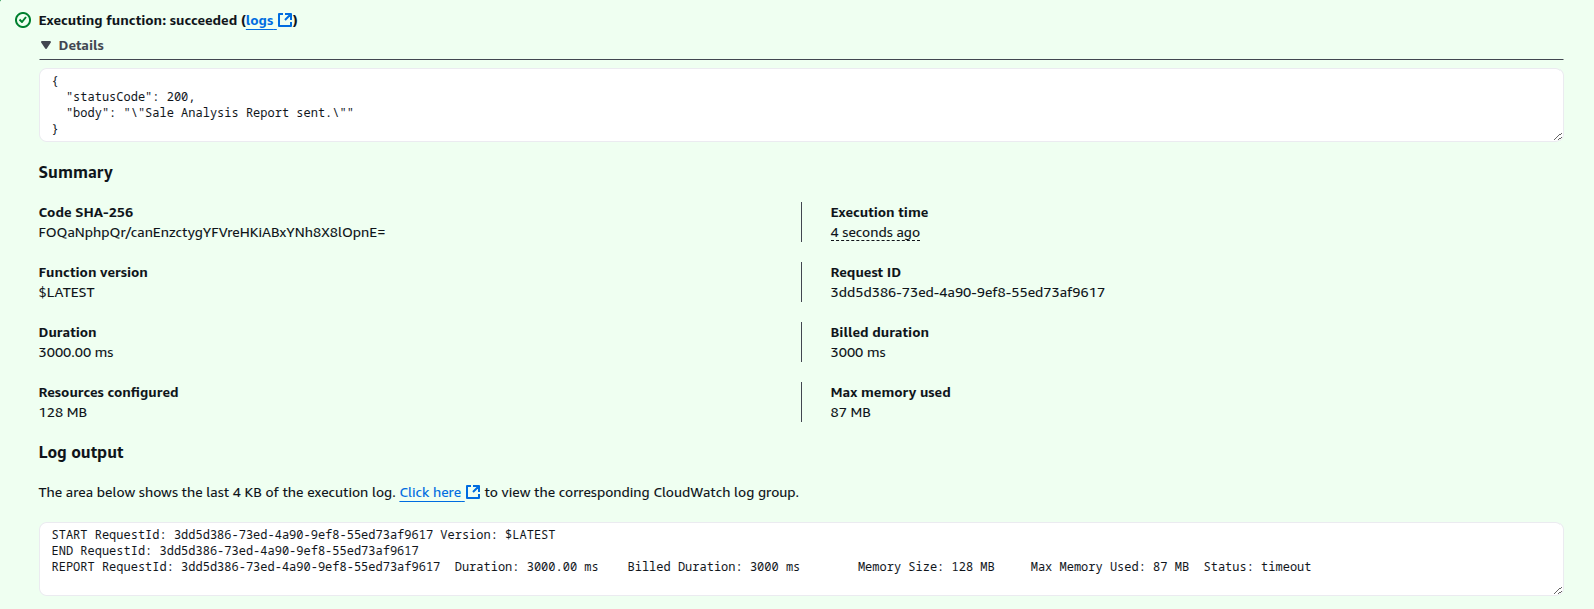

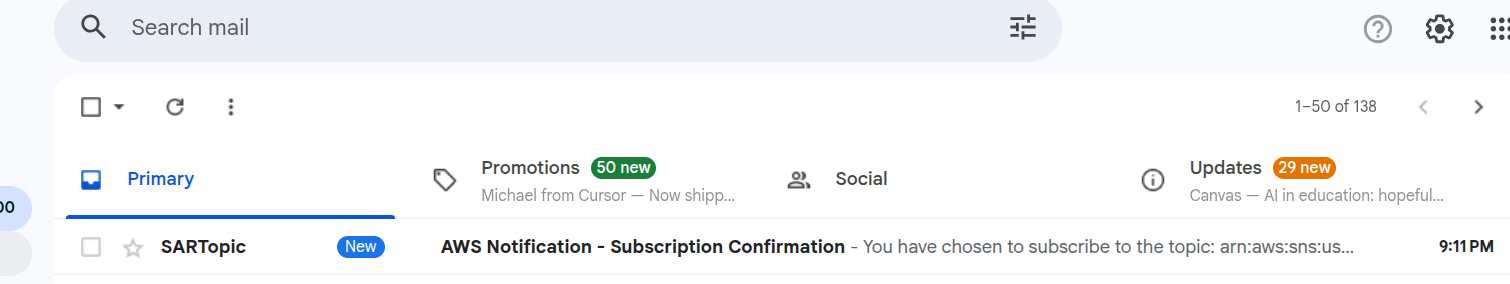

# Lab 178 - AWS Lambda Exercise (Challenge)

# APIs and REST

## API

- Provides programattic access to an application
    - The client application sends a request to the server application using the API.
    - THe server application returns the response to the client application.

- benefits:
    - Provides access to an application's functions without a GUI
    - Provides consistent way to invoke an application's functions

## Restful API

- Designed for loosely coupled network-based applications

- Communicates over HTTP
- Exposes resources at specific URIs
- Most web API

### REST Design Principles

- The client should have a **uniform interface** to access the server.
    - A request should be made to a single endpoint or URI when it interacts with each distinct resource that is part of the service. 

    - The interface does not define the structure of what is returned when the client makes a request.

- **Stateless** - The server does not track which requests the connecting client has made over time.
    - It also does not keep track of which step the client might have completed in terms of a series of actions.

    - Instead, any session information about the client is known only to the client itself.

- **Cacheable** - Clients cache responses that they recieve from REST servers.

- **Support Layered Systems** where the client might connect to an immediate server. 
    - The REST Server can be distributed, which supports **load balancing**.

- **Code on Demand** (Optional) - The server could pass code to the client. Not widely adopted but an optional component.



### RESTful Components

- **Client** - Users who access the information.

- **Resource** - Informatiion provided to client.

- **Request** - Sent by client to server in a format the server understands

- **Response** - Returned by server, which includes a *status message*, a *message body*, and *metadata*.

### REST Request Format

- **Endpoint** - In a form of a URL, which provides a way for the client to notify the server about the resources that it wants to interact with.

- **Method** 
    - *GET* - Server requested to retrieve resource
    - *POST* - Server requested to create new resource
    - *PUT* - Update existing resource
    - *DELETE* - Obliterate that sh*t!

- **Header** - Contains the metadata
- **Request body** - The data the client sends to the server. A POST or PUT contains a body. GET rarely has it.

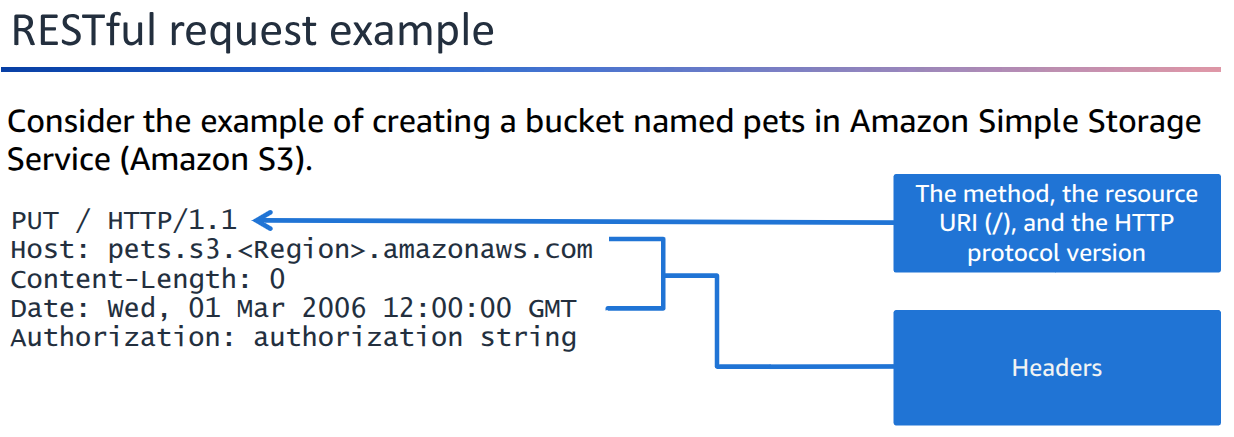

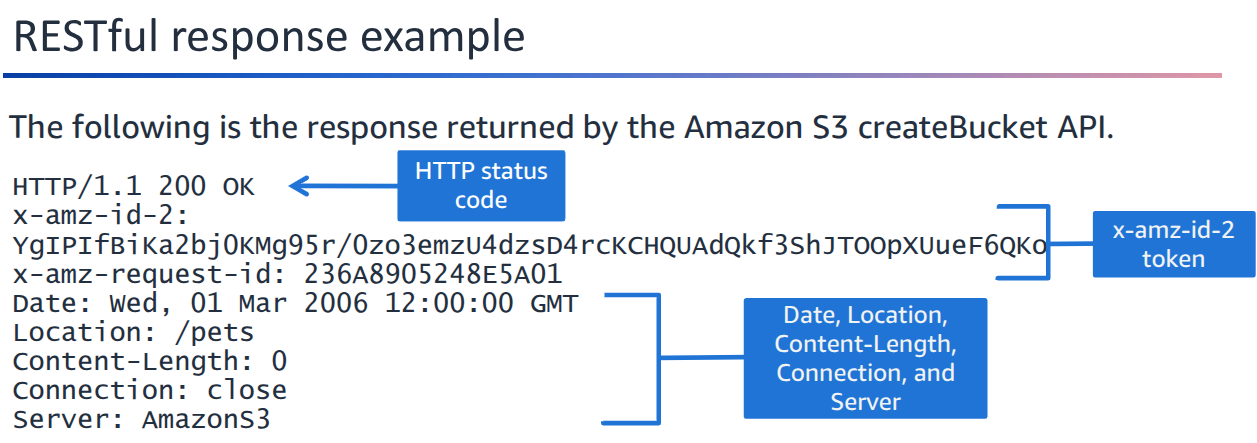

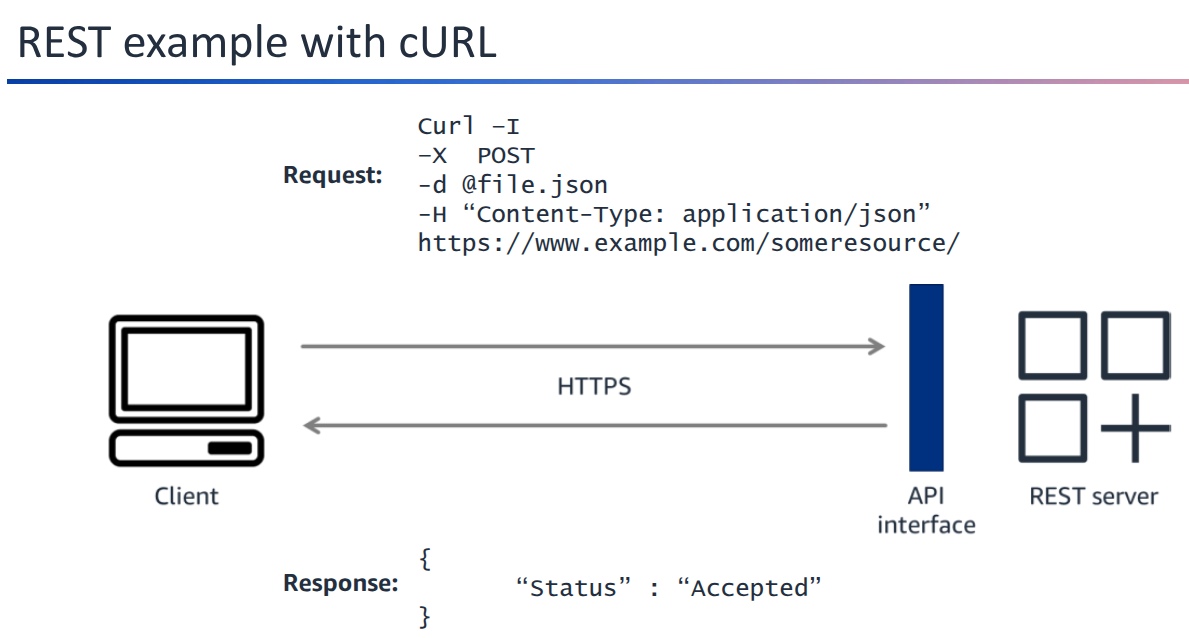

## HTTP Status Codes

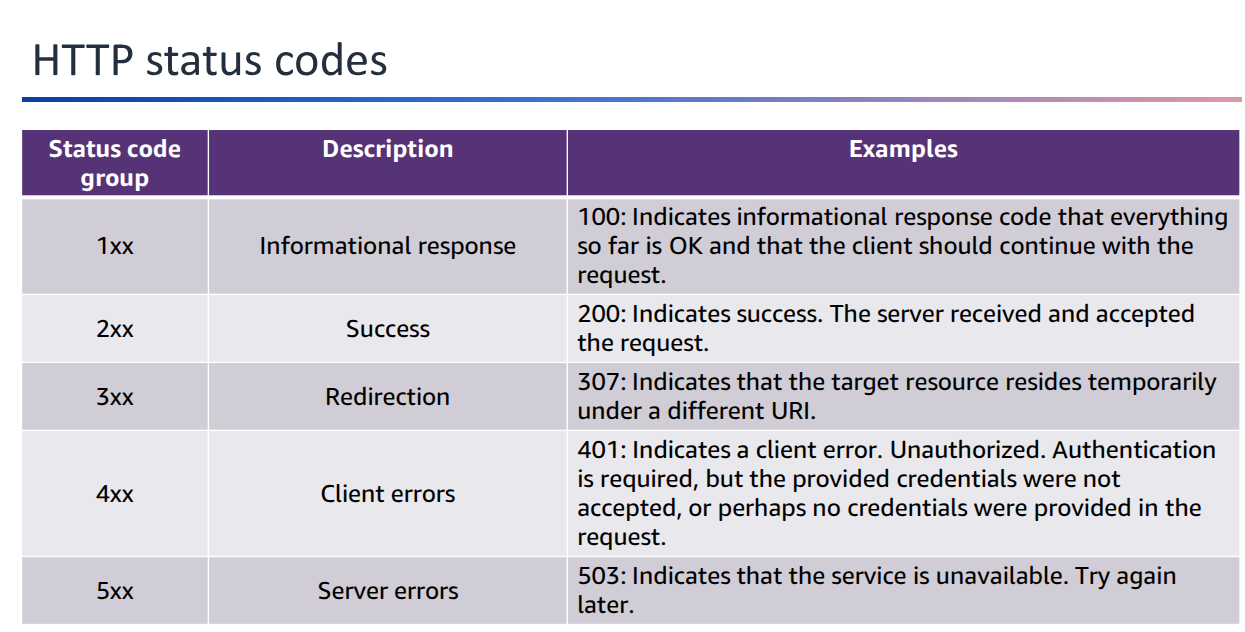

# Amazon API Gateway

# AWS Step Functions

# Containers